In [11]:

%run setup.py
%run funs.py

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#  extract the x axis order
fafb_tbl = pd.read_excel(wd + "tables/210202-fafb_pn_counts.xlsx", index_col=0)
hemi_tbl = pd.read_excel(wd + "tables/210201-hemibrain_pn_counts.xlsx", index_col=0).rename(columns={"hemi_pn":"gloms"})
hemi_tbl.loc[52, "gloms"] = "VP1"
m_tbl = fafb_tbl.merge(hemi_tbl, how='outer', on="gloms")
m_tbl.drop(index=54, inplace=True)
m_tbl = m_tbl.sort_values("fafb_counts", ascending=False).reset_index()

comm_gloms = df_lookup('glom_id', comm_ids, 'short_glom_name', glom_btn_table)

In [13]:
comm_gloms = df_lookup('glom_id', comm_ids, 'short_glom_name', glom_btn_table)

In [14]:
colors = [sns.color_palette("tab10")[i] for i in [2,1]]

fs = 18
tpad = 20
# date = '210422'
date= '211031'



In [15]:
import seaborn as sns
from scipy import stats
from matplotlib.ticker import MaxNLocator

In [16]:
#------------------------------------------------------
# boutons per glom
p_tbl = glom_btn_table
p_tbl = p_tbl.rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.sort_values("bouton_count", ascending=False)
p_tbl = p_tbl.reset_index()

# food vs. non-food
t1_tbl = tbl.loc[:,["significance","short_glom_name"]].rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.merge(t1_tbl.iloc[[t1_tbl.gloms.tolist().index(i) for i in pd.unique(t1_tbl.gloms)],:],how="left")
p_tbl = p_tbl.query("significance != 'Unknown'")

In [17]:
sns.set_style("whitegrid")

In [18]:

import seaborn as sns
from matplotlib.ticker import MaxNLocator

colors = [sns.color_palette("tab10")[i] for i in [2,1]]

fs = 18
tpad = 20


btn_freq1 = p_tbl.query("significance=='Food'").bouton_count
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance!='Food'").bouton_count
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

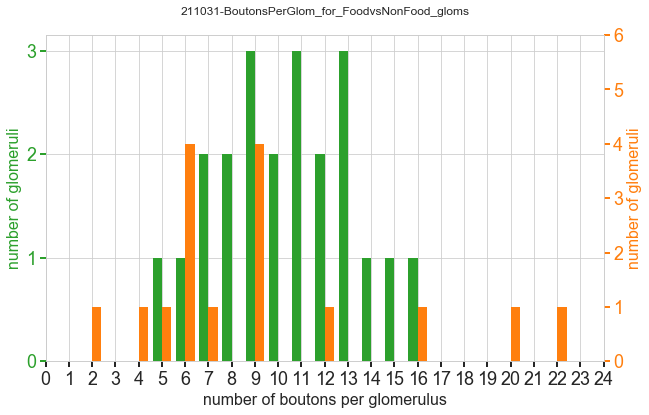

In [19]:
wid = 0.4
colors = [sns.color_palette("tab10")[i] for i in [2,1]]
f1 = freq1[1:]
f2 = freq2[1:]

name = "FoodvsNonFood"
t8 = date + "-BoutonsPerGlom_for_{}_gloms".format(name)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

r1 = ax1.bar(f1.index - 0.2, f1, wid, align='center', color=colors[0], linewidth=0)
r2 = ax2.bar(f2.index + 0.2, f2, wid, align='center', color=colors[1], linewidth=0)
# plt.xticks(np.arange(2+0.25, 26+0.25, 2), np.arange(2, 26, step=2))
plt.xticks(np.arange(0, 26, 1), np.arange(0, 26, step=1))
ax2.grid(False)
ax2.set_ylim(0,6)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_ylabel("number of glomeruli", fontsize=16, color=colors[0])
ax2.set_ylabel("number of glomeruli", fontsize=16, color=colors[1])
ax1.set_xlabel( 'number of boutons per glomerulus', fontsize=16)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_xbound(0,24)
ax2.set_xbound(0,24)
fig.set_size_inches(10,6)
# fig.savefig("test.png")
# fig.savefig(save_path + t8 +  "wticks" +  ".png", bbox_inches='tight', dpi=600)

f1

In [33]:
#------------------------------------------------------
# boutons per glom
p_tbl = glom_btn_table
p_tbl = p_tbl.rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.sort_values("bouton_count", ascending=False)
p_tbl = p_tbl.reset_index()

# food vs. non-food
t1_tbl = tbl.loc[:,["significance","short_glom_name"]].rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.merge(t1_tbl.iloc[[t1_tbl.gloms.tolist().index(i) for i in pd.unique(t1_tbl.gloms)],:],how="left")

In [34]:
sns.set_style("whitegrid")
import seaborn as sns
from matplotlib.ticker import MaxNLocator

colors = [sns.color_palette("tab10")[i] for i in [2,1]]

fs = 18
tpad = 20


btn_freq1 = p_tbl.query("significance=='Food'").bouton_count
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance!='Food'").bouton_count
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

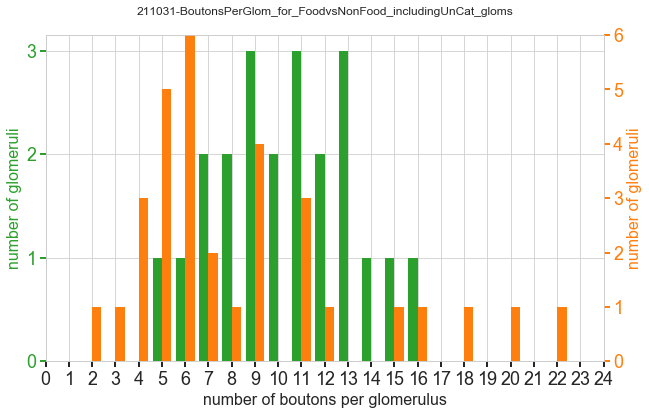

In [36]:
wid = 0.4
colors = [sns.color_palette("tab10")[i] for i in [2,1]]
f1 = freq1[1:]
f2 = freq2[1:]

name = "FoodvsNonFood_includingUnCat"
t8 = date + "-BoutonsPerGlom_for_{}_gloms".format(name)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

r1 = ax1.bar(f1.index - 0.2, f1, wid, align='center', color=colors[0], linewidth=0)
r2 = ax2.bar(f2.index + 0.2, f2, wid, align='center', color=colors[1], linewidth=0)
# plt.xticks(np.arange(2+0.25, 26+0.25, 2), np.arange(2, 26, step=2))
plt.xticks(np.arange(0, 26, 1), np.arange(0, 26, step=1))
ax2.grid(False)
ax2.set_ylim(0,6)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_ylabel("number of glomeruli", fontsize=16, color=colors[0])
ax2.set_ylabel("number of glomeruli", fontsize=16, color=colors[1])
ax1.set_xlabel( 'number of boutons per glomerulus', fontsize=16)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_xbound(0,24)
ax2.set_xbound(0,24)
fig.set_size_inches(10,6)
# fig.savefig("test.png")
# fig.savefig(save_path + t8 +  "wticks" +  ".png", bbox_inches='tight', dpi=600)

In [3]:
#-------------------------------------------------------
# food vs. non-food claws per glomerulus
gloms = []
claws = []
for glom in pd.unique(tbl.short_glom_name):
    gloms.append(glom)
    claws.append(tbl.query("short_glom_name==@glom")["num_claws"].sum())


p_tbl = pd.DataFrame({"gloms":gloms, "num_claws": claws})

p_tbl = p_tbl.sort_values("num_claws", ascending=False)
p_tbl = p_tbl.reset_index()

t1_tbl = tbl.loc[:,["significance","short_glom_name"]].rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.merge(t1_tbl.iloc[[t1_tbl.gloms.tolist().index(i) for i in pd.unique(t1_tbl.gloms)],:],how="left")

p_tbl = p_tbl.query("significance != 'Unknown'")

In [4]:

btn_freq1 = p_tbl.query("significance == 'Food'").num_claws
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance != 'Food'").num_claws
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

In [ ]:
stats.ks_2samp(btn_freq1, btn_freq2)

In [14]:
bins

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375])

In [15]:
bins_shifted

array([ 10.,  35.,  60.,  85., 110., 135., 160., 185., 210., 235., 260.,
       285., 310., 335., 360., 385.])

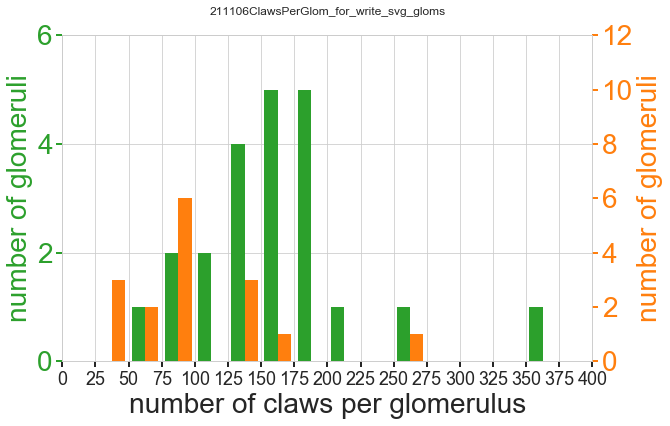

In [89]:
date = "211106"

# save_path = "/Users/zhengz11/myscripts/data_results/211031-bar_graph_replots/Fig3_SFig1/"


t8 = date + "ClawsPerGlom_for_{}_gloms".format(name)
colors = [sns.color_palette("tab10")[i] for i in [2,1]]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# ax1.hist([btn_freq1, btn_freq2], bins=bnp.arange(0,400,25))
n, bins, patches = ax1.hist([btn_freq1, btn_freq2], bins=np.arange(0,400,25))
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1] + 2.5, n[0], width, align='edge', color=colors[0], linewidth=0)

ax2.bar(bins_shifted[:-1] + 2.5, n[1], width, align='edge', color=colors[1], linewidth=0)

ax1.set_title(t8, pad = tpad)
ax1.set_xlim(0,400)
ax1.set_xticks(np.arange(0, 425, 25))

ax1.set_yticks(np.arange(0,8,2))
ax2.set_yticks(np.arange(0,14,2))

ax2.grid(False)
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=18, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=18, length=6, width=2)
ax1.tick_params('y', colors=colors[0], labelsize=28)
ax2.tick_params('y', colors=colors[1], labelsize=28)
ax1.set_ylabel("number of glomeruli", fontsize=28, color=colors[0])
ax2.set_ylabel("number of glomeruli", fontsize=28, color=colors[1])
ax1.set_xlabel('number of claws per glomerulus', fontsize= 28 )

fig.set_size_inches(9.5,6)
# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [64]:
# claws per bouton


colors = [sns.color_palette("tab10")[i] for i in [2,1]]

t4 = pd.read_csv(wd + "tables/200704-bouton_table", index_col=0)
t4['pn_ids_ordered'] = pd.Categorical(t4.pn_ids, ordered=True, categories=pd.unique(t4.pn_ids))
t4 = t4.query("significance != 'Unknown'")

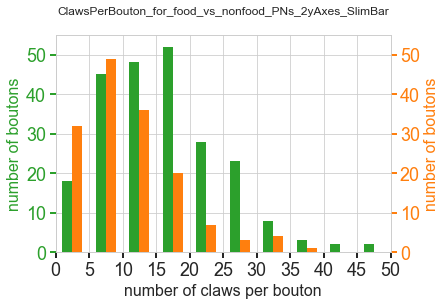

In [108]:
width = 1.5

date = "211105"

# save_path = "/Users/zhengz11/myscripts/data_results/211031-bar_graph_replots/Fig3_SFig1/"

bin_rg = np.arange(0,55,5)

names = ['food', 'non-food', 'community', 'non-community']
ylims = [40, 60, 25, 80]
hist_set = [t4.query("significance=='Food'")['claws_per_bouton'], 
            t4.query("significance!='Food'")['claws_per_bouton'], 
            t4.query("community==True")['claws_per_bouton'], 
            t4.query("community==False")['claws_per_bouton']  ] 

## This is the version with only one two y axes
t8 = "ClawsPerBouton_for_{}_PNs_2yAxes_SlimBar".format("food_vs_nonfood")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(hist_set[:2], bins=bin_rg)
n, bins, patches = ax1.hist(hist_set[:2], bins=bin_rg)
ax1.cla() #clear the axis

#plots the histogram data
# width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1]+1, n[0], width, align='edge', color=colors[0], linewidth=0)

ax2.bar(bins_shifted[:-1]+1, n[1], width, align='edge', color=colors[1], linewidth=0)
ax1.set_yticks(np.arange(0,55,10))
ax2.set_yticks(np.arange(0,55,10))

ax1.set_xticks(np.arange(0,55,5))

ax1.set_ylim(0,55)
ax2.set_ylim(0,55)
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_ylabel("number of boutons", fontsize=16, color=colors[0])
ax2.set_ylabel("number of boutons", fontsize=16, color=colors[1])
ax1.set_xlabel( 'number of claws per bouton', fontsize=16 )
ax2.grid(False)

# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [138]:
# PNs per glomerulus 

fafb_tbl = pd.read_excel(path + "tables/210202-fafb_pn_counts.xlsx", index_col=0)
hemi_tbl = pd.read_excel(wd + "tables/210201-hemibrain_pn_counts.xlsx", index_col=0).rename(columns={"hemi_pn":"gloms"})

hemi_tbl.loc[52, "gloms"] = "VP1"
m_tbl = fafb_tbl.merge(hemi_tbl, how='outer', on="gloms")
m_tbl.drop(index=54, inplace=True)

p_tbl = m_tbl
p_tbl = p_tbl.sort_values("fafb_counts", ascending=False).reset_index()

t1_tbl = tbl.loc[:,["significance","short_glom_name"]].rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.merge(t1_tbl.iloc[[t1_tbl.gloms.tolist().index(i) for i in pd.unique(t1_tbl.gloms)],:],how="left")

p_tbl = p_tbl.query("significance != 'Unknown'")

btn_freq1 = p_tbl.query("significance == 'Food'").fafb_counts.astype("int")
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance != 'Food'").fafb_counts.astype("int")
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

In [139]:
sns.set_style("whitegrid")
import seaborn as sns
from matplotlib.ticker import MaxNLocator

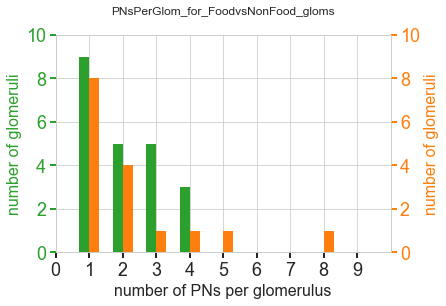

In [141]:
date = "211107"

wid = 0.3
name = "FoodvsNonFood"
t8 = "PNsPerGlom_for_{}_gloms".format(name)
# t8 = "PNsPerGlom_for_{}_gloms_IncludeUncat".format(name)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

r1 = ax1.bar(freq1.index - 0.15, freq1, wid, align='center', color=colors[0], linewidth=0)
r2 = ax2.bar(freq2.index + 0.15, freq2, wid, align='center', color=colors[1], linewidth=0)
# plt.xticks(np.arange(0.25, 10.25, 2), np.arange(0, 10, step=2))
ax2.grid(False)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_yticks(np.arange(0,16,2))
ax2.set_yticks(np.arange(0,16,2))
ax1.set_xticks(np.arange(0,10,1))
ax2.set_xticks(np.arange(0,10,1))
ax1.set_ylim(0,10)
ax2.set_ylim(0,10)

ax1.set_ylabel("number of glomeruli", fontsize=16, color=colors[0])
ax2.set_ylabel("number of glomeruli", fontsize=16, color=colors[1])
ax1.set_xlabel( 'number of PNs per glomerulus', fontsize=16 )
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_xbound(0,10)
ax2.set_xbound(0,10)
# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [142]:
# including uncategorized PNs

# PNs per glomerulus 
fafb_tbl = pd.read_excel(path + "tables/210202-fafb_pn_counts.xlsx", index_col=0)
hemi_tbl = pd.read_excel(wd + "tables/210201-hemibrain_pn_counts.xlsx", index_col=0).rename(columns={"hemi_pn":"gloms"})

hemi_tbl.loc[52, "gloms"] = "VP1"
m_tbl = fafb_tbl.merge(hemi_tbl, how='outer', on="gloms")
m_tbl.drop(index=54, inplace=True)

p_tbl = m_tbl
p_tbl = p_tbl.sort_values("fafb_counts", ascending=False).reset_index()

t1_tbl = tbl.loc[:,["significance","short_glom_name"]].rename(columns={"short_glom_name":"gloms"})
p_tbl = p_tbl.merge(t1_tbl.iloc[[t1_tbl.gloms.tolist().index(i) for i in pd.unique(t1_tbl.gloms)],:],how="left")

# p_tbl = p_tbl.query("significance != 'Unknown'")


btn_freq1 = p_tbl.query("significance == 'Food'").fafb_counts.astype("int")
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance != 'Food'").fafb_counts.astype("int")
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

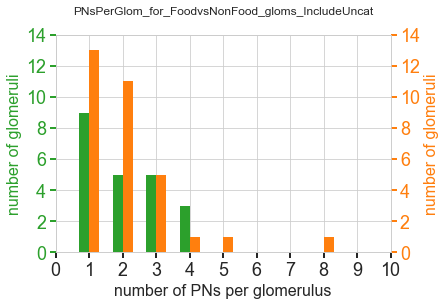

In [144]:
date = "211107"

wid = 0.3
name = "FoodvsNonFood"
t8 = "PNsPerGlom_for_{}_gloms_IncludeUncat".format(name)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

r1 = ax1.bar(freq1.index -0.15, freq1, wid, align='center', color=colors[0], linewidth=0)
r2 = ax2.bar(freq2.index + 0.15, freq2, wid, align='center', color=colors[1], linewidth=0)
# plt.xticks(np.arange(0.25, 10.25, 2), np.arange(0, 10, step=2))
ax2.grid(False)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_yticks(np.arange(0,16,2))
ax2.set_yticks(np.arange(0,16,2))
ax1.set_xticks(np.arange(0,11,1))
ax2.set_xticks(np.arange(0,11,1))
ax1.set_ylim(0,14)
ax2.set_ylim(0,14)

ax1.set_ylabel("number of glomeruli", fontsize=16, color=colors[0])
ax2.set_ylabel("number of glomeruli", fontsize=16, color=colors[1])
ax1.set_xlabel( 'number of PNs per glomerulus', fontsize=16 )
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_xbound(0,10)
ax2.set_xbound(0,10)
# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [156]:
# boutons per PNs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator


p_tbl = tbl

p_tbl = p_tbl.query("significance != 'Unknown'")

In [126]:
wid

0.3

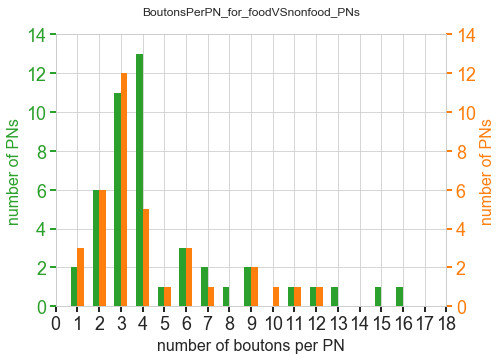

In [157]:

name = "foodVSnonfood"

btn_freq1 = p_tbl.query("significance=='Food'").num_boutons
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance!='Food'").num_boutons
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

t8 = "BoutonsPerPN_for_{}_PNs".format(name)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

r1 = ax1.bar(freq1.index - 0.15, freq1, wid, align='center', color=colors[0], linewidth=0)
r2 = ax2.bar(freq2.index + 0.15, freq2, wid, align='center', color=colors[1], linewidth=0)
plt.xticks(np.arange(0, 20, 1), np.arange(0, 20, 1))
ax2.grid(False)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_ylim(0,14)
ax2.set_ylim(0,14)

ax1.set_ylabel("number of PNs", fontsize=16, color=colors[0])
ax2.set_ylabel("number of PNs", fontsize=16, color=colors[1])

ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_xlabel( 'number of boutons per PN', fontsize=16)
ax1.set_xbound(0,18)
ax2.set_xbound(0,18)
fig.set_size_inches(7,5)
# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [129]:
fig.get_size_inches()

array([6., 4.])

In [146]:
# boutons per PNs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from matplotlib.ticker import MaxNLocator

p_tbl = tbl

# p_tbl = p_tbl.query("significance != 'Unknown'")

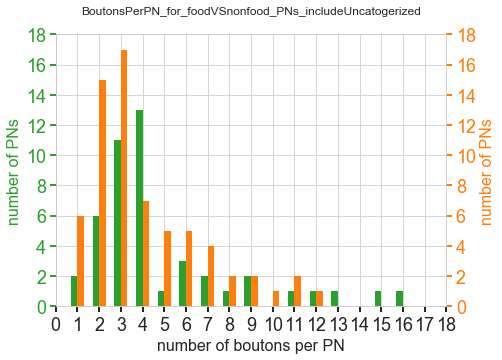

In [152]:

name = "foodVSnonfood"

btn_freq1 = p_tbl.query("significance=='Food'").num_boutons
freq = pd.Series(btn_freq1).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq1 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

btn_freq2 = p_tbl.query("significance!='Food'").num_boutons
freq = pd.Series(btn_freq2).value_counts()
t1 = [i for i in range(0, max(freq.index)) if i not in freq.index]
freq2 = pd.concat([pd.Series([0]*len(t1),index=t1),freq]).sort_index()

t8 = "BoutonsPerPN_for_{}_PNs_includeUncatogerized".format(name)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

r1 = ax1.bar(freq1.index - 0.15, freq1, wid, align='center', color=colors[0], linewidth=0)
r2 = ax2.bar(freq2.index + 0.15, freq2, wid, align='center', color=colors[1], linewidth=0)
plt.xticks(np.arange(0, 20, 1), np.arange(0, 20, 1))
ax2.grid(False)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_ylim(0,18)
ax2.set_ylim(0,18)

ax1.set_ylabel("number of PNs", fontsize=16, color=colors[0])
ax2.set_ylabel("number of PNs", fontsize=16, color=colors[1])
ax1.set_xlabel( 'number of boutons per PN', fontsize=16 )
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs, length=6, width=2)
ax1.set_xbound(0,18)
ax2.set_xbound(0,18)
fig.set_size_inches(7,5)
# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [3]:

t4 = pd.read_csv(wd + "tables/200704-bouton_table", index_col=0)
t4['pn_ids_ordered'] = pd.Categorical(t4.pn_ids, ordered=True, categories=pd.unique(t4.pn_ids))


bin_rg = np.arange(0,55,2.5)

names = ['food', 'non-food', 'community', 'non-community']
ylims = [40, 60, 25, 80]
hist_set = [t4.query("significance=='Food'")['claws_per_bouton'], 
            t4.query("significance!='Food'")['claws_per_bouton'], 
            t4.query("community==True")['claws_per_bouton'], 
            t4.query("community==False")['claws_per_bouton']  ] 

In [4]:
bin_rg = np.arange(0,55,5)

In [170]:
bins

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

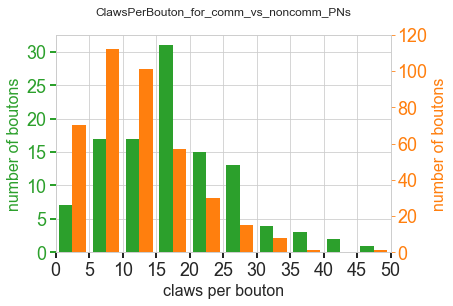

In [23]:
date = "211108"
t8 = "ClawsPerBouton_for_{}_PNs".format("comm_vs_noncomm")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(hist_set[2:], bins=bin_rg)
n, bins, patches = ax1.hist(hist_set[2:], bins=bin_rg)
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1] + 0.5, n[0], width, align='edge', color=colors[0], linewidth=0)
ax2.bar(bins_shifted[:-1] + 0.5, n[1], width, align='edge', color=colors[1], linewidth=0)

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.set_yticks(np.arange(0,35,5))
ax2.set_yticks(np.arange(0,140,20))
ax1.set_xticks(np.arange(0,55,5))
# ax2.set_xticks(np.arange(0,55,5))
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_title(t8, pad=tpad)
ax1.tick_params(labelsize=fs, bottom=True, length=6, width=2)
ax2.tick_params(labelsize=fs)
ax1.set_ylabel("number of boutons", fontsize=16, color=colors[0])
ax2.set_ylabel("number of boutons", fontsize=16, color=colors[1])
ax1.set_xlabel( 'claws per bouton', fontsize=16 )
ax2.grid(False)
# fig.savefig(save_path + "{}-".format(date) + t8 + ".png", bbox_inches='tight', dpi=600)

In [160]:
bins

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
       27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5])

In [161]:
bin_rg

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
       27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5])

In [24]:
save_path + "{}-".format(date) + t8 + ".png"

'/Users/zhengz11/myscripts/data_results/211031-bar_graph_replots/211108-ClawsPerBouton_for_comm_vs_noncomm_PNs.png'